# Clustering Algorithm

Loading data of wine dataset , based on offers we are segmenting the customers into groups 

### Steps 
1. Load Data
2. Data Wrangling
3. Finding K values
    * KMeans
    * Silloutte Score
    * Other Methods
4. Visualize using PCA 
5. Modeling 
    * KMeans
    * Affinity propagation
    * Spectral clustering
    * Agglomerative clustering
    * DBSCAN

In [1]:
#  Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)

In [4]:
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [5]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [11]:
merged = pd.merge(df_transactions, df_offers,on=['offer_id'])
ds = pd.get_dummies(data = merged, columns= ['offer_id'])
ds = ds.drop(['campaign','varietal','discount','origin'],axis=1)
merged = merged.drop(['campaign','varietal','discount','origin'],axis=1)


In [14]:
ds['past_peak'] = np.where(ds['past_peak'], 1,0)

In [15]:
ds

,customer_name,n,min_qty,past_peak,offer_id_1,offer_id_2,offer_id_3,offer_id_4,offer_id_5,offer_id_6,...,offer_id_23,offer_id_24,offer_id_25,offer_id_26,offer_id_27,offer_id_28,offer_id_29,offer_id_30,offer_id_31,offer_id_32
0,Smith,1,72,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rodriguez,1,72,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Martin,1,72,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jackson,1,72,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Campbell,1,72,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Hill,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,Carter,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,James,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,Hughes,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We now want to make a pivot table
pivoted = merged.pivot_table(index='customer_name', columns='offer_id', values='n', fill_value=0)

pivoted.head(5)

pivoted = ds.pivot_table(index='customer_name', columns=['offer_id'], values='n', fill_value=0)

In [17]:

ds = ds.set_index('customer_name' )

# Modeling

In [18]:
ds

,n,min_qty,past_peak,offer_id_1,offer_id_2,offer_id_3,offer_id_4,offer_id_5,offer_id_6,offer_id_7,...,offer_id_23,offer_id_24,offer_id_25,offer_id_26,offer_id_27,offer_id_28,offer_id_29,offer_id_30,offer_id_31,offer_id_32
customer_name,,,,,,,,,,,,,,,,,,,,,
Smith,1,72,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rodriguez,1,72,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Martin,1,72,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jackson,1,72,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campbell,1,72,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hill,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carter,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
James,1,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import sklearn.cluster

In [26]:
X = ds.values
X

array([[ 1, 72,  0, ...,  0,  0,  0],
       [ 1, 72,  0, ...,  0,  0,  0],
       [ 1, 72,  0, ...,  0,  0,  0],
       ...,
       [ 1,  6,  0, ...,  0,  0,  0],
       [ 1,  6,  0, ...,  0,  0,  0],
       [ 1,  6,  0, ...,  0,  0,  0]])

## Choosing K : KMeans 

In [27]:
# Make an empty list
ss = []

# Make an empty dictionary called assignments 
assignments = {}


Krange  = list(range(2,10 ))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2)) # where ss is sum_of_squares 
    assignments[str(K)] = assigned_cluster

Text(0, 0.5, 'Sum of Squares')

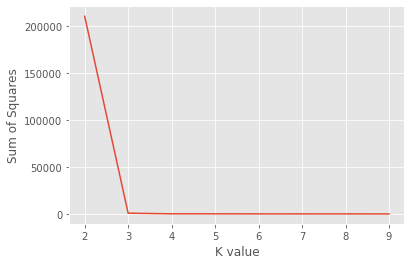

In [28]:
# Call plot() on plt with parameters Krange and ss
_=plt.plot(Krange, ss) # we need to plot Krange and Sum of Squares to identify the correct cluster

# Let's label the plot 
plt.xlabel("K value")
plt.ylabel("Sum of Squares")

#### The plot is not clear but based on this , we can consider __3 Clusters__

3


([<matplotlib.axis.XTick at 0x123e3fd30>,
 <a list of 3 Text major ticklabel objects>)

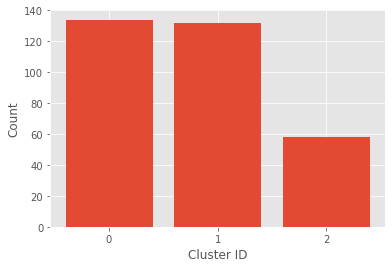

In [29]:
# What is the best K? Fill in the assignment below appropriately
best_K = 3
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
_=plt.bar(range(best_K), counts, align = 'center')

# Label the axes 
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

Text(0, 0.5, 'Average Silhouette Score')

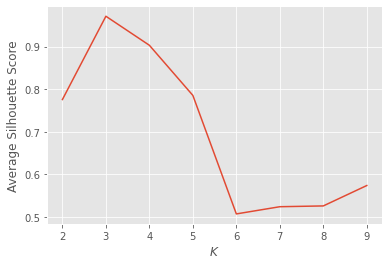

In [46]:
# Computing the avrage silhouette score for each K and plotting it 
# Call plot() with parameters KRange, avg_silhouette_scores
plt.plot(Krange, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

## 2. Choosing K: The Silhouette Method

In [ ]:
X

In [30]:
avg_silhouette_scores = []

for K in Krange:
    clusterer= sklearn.cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg  = sklearn.metrics.silhouette_score(X,cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)
    print ('Model with {} clusters is {}'.format(K,silhouette_avg))

Model with 2 clusters is 0.7755690263800046
Model with 3 clusters is 0.9710042991584421
Model with 4 clusters is 0.9028872130684155
Model with 5 clusters is 0.7852333052520365
Model with 6 clusters is 0.5071309992999034
Model with 7 clusters is 0.524025888970872
Model with 8 clusters is 0.525886190499687
Model with 9 clusters is 0.573755292478378


#### Model with 3 Clusters is having HIGH Silhouette score so we can decide clusters = 3

Text(0, 0.5, 'Average Silhouette Score')

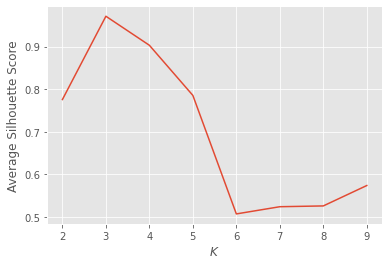

In [31]:
# Computing the avrage silhouette score for each K and plotting it 
# Call plot() with parameters KRange, avg_silhouette_scores
plt.plot(Krange, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

#### From the above plot, we can see Clusters = 3 is having HIGH Silhouette score

## Also we have other methods to detrmine clusters
* Gap Statistics
* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

# Visualizing Clusters using PCA

In [32]:
import sklearn.decomposition
import matplotlib.colors

In [33]:
# Using the cluster we decide using Sillouotte score,
model = sklearn.cluster.KMeans(n_clusters=3)
# Call a fit_predict() on X 
cluster_assignments = model.fit_predict(X)
(cluster_assignments)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,

In [ ]:
## Visualization using PCA

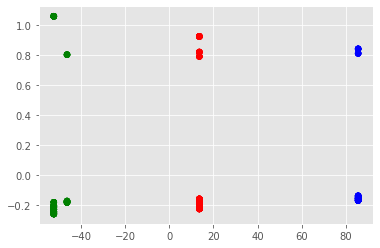

In [34]:
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(),cmap=cmap)

Text(0, 0.5, 'Proportion of Variance Explained')

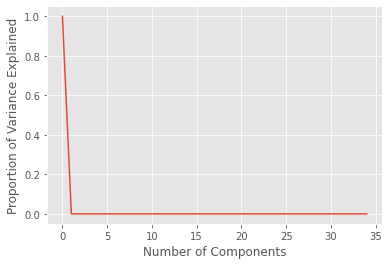

In [35]:
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition

pca = sklearn.decomposition.PCA()

# Call fit() on pca, with X passed to the method
pca.fit(X)

# Let's finish this :)  Make a variable called variance
variance = pca.explained_variance_ratio_

# Plot() it 
plt.plot(range(len(variance)), variance)

# Label the axes
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")

#### Based on this chart, we can consider number of components to 95% of the model

### Evaluating score for KMeans

In [36]:
clusterer= sklearn.cluster.KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print (f' Score of KMeans Model is {sklearn.metrics.silhouette_score(X,cluster_labels)}')

 Score of KMeans Model is 0.9710042991584421


# Trying other Clustering Models

## 2. AgglomerativeClustering

In [37]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# Building model

In [38]:
agg_clust = AgglomerativeClustering()
labels = agg_clust.fit_predict(X)

In [ ]:
# evaluting score

In [39]:
silhouette_avg = (silhouette_score(X, labels))
print('Silhouette Score of AgglomerativeClustering = ', silhouette_avg)

Silhouette Score of AgglomerativeClustering =  0.7755690263800046


## 3. DBSCAN Clustering

In [40]:
from sklearn.cluster import DBSCAN

# Building model
dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(X)

# evaluting score
silhouette_avg = (silhouette_score(X, labels))
print('Silhouette Score of DBSCAN Clustering = ', silhouette_avg)


Silhouette Score of DBSCAN Clustering =  0.9028872130684155


## 4. Spectral clustering

In [41]:
from sklearn.cluster import SpectralClustering

# Building model
spec_clust = SpectralClustering(random_state=0)
labels = spec_clust.fit_predict(X)

# evaluting score
silhouette_avg = (silhouette_score(X, labels))
print('Silhouette Score of Spectral Clustering = ', silhouette_avg)

Silhouette Score of Spectral Clustering =  0.6779554377683465


/Users/karthimohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [42]:
import warnings
warnings.filterwarnings('ignore')

## 5. Affinity Propagation

In [44]:
from sklearn.cluster import AffinityPropagation

# Building model
aff_prop = AffinityPropagation(random_state=100)
labels = aff_prop.fit_predict(X)

# evaluting score
silhouette_avg = (silhouette_score(X, labels))
#print('Silhouette Score of Affinity Propagation = ', silhouette_avg)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [25]:
aff_prop.n_iter_

200

# Conclusion

__Comparing the models, I think using 3 clusters is a better fit.
Also, Based on Silhouette score, KMeans Algorithm with clusters= 3 is a better fit.__